<h1><strong>Logistic Regression </strong></h1>
<h3> La regresión logística es un modelo linear que funciona calculando, mediante una funcion logistica, las probabilidades de que un evento binario ocurra o no. </h3>
<br> Importo los modulos necesarios

In [2]:
import sys
sys.path.insert(1, '../FeatureEngineering')

import pandas as pd
import numpy as np
import nbimporter # pip install nbimporter

import sklearn
from sklearn.naive_bayes  import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import f1_score, plot_confusion_matrix

import matplotlib.pyplot as plt

from feature_builder import process_dataset
from Exporter import export_model_csv, export_skf_model_csv
from hyperparameter_tunning import obtener_hiperparametros

Importing Jupyter notebook from Exporter.ipynb
Importing Jupyter notebook from hyperparameter_tunning.ipynb


<h3>Cargo los datos necesarios

In [2]:
train_dataset = pd.read_csv('train.csv')

In [3]:
test_dataset = pd.read_csv('test.csv')

In [4]:
y = train_dataset.loc[:,'target']

In [5]:
params = obtener_hiperparametros()['Logistic-Regression']

<h2><strong>Declaro las distintas combinaciones de features

<h3>Tf-idf

In [25]:
x_tfidf = process_dataset(train_dataset, text_type='tfidf', use_manual_features=False, use_spacy=False)

In [26]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size = .30, random_state = 17)

<h3> Procesadas con spacy y embeddings y features manuales

In [31]:
x_processed = process_dataset(train_dataset)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5961027457927369


In [32]:
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(x_processed, y, test_size = .33, random_state = 17)

<h3>Procesadas solo con embeddings y spacy

In [12]:
x_embedd = process_dataset(train_dataset, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5961027457927369


In [13]:
x_train_embedd, x_test_embedd, y_train_embedd, y_test_embedd = train_test_split(x_embedd, y, test_size = .30, random_state = 17)

<h2><strong>Ahora pruebo los algoritmos

<h3>Primero pruebo con tf-idf

In [27]:
logisticRegr_tfidf = LogisticRegression(**params)

In [28]:
logisticRegr_tfidf.fit(x_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred_tfidf = logisticRegr_tfidf.predict(x_test_tfidf)

In [30]:
f1_score(y_test_tfidf, y_pred_tfidf)

0.7063778580024067

<h3>Embeddings, spacy y manuales

In [33]:
logisticRegr_processed = LogisticRegression(**params)

In [34]:
logisticRegr_processed.fit(x_train_processed, y_train_processed)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred_processed = logisticRegr_processed.predict(x_test_processed)

In [36]:
f1_score(y_test_processed, y_pred_processed)

0.7765602667937114

<h3>Embeddings y spacy 

In [14]:
logisticRegr_embedd = LogisticRegression(**params)

In [15]:
logisticRegr_embedd.fit(x_train_embedd, y_train_embedd)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred_embedd = logisticRegr_embedd.predict(x_test_embedd)

In [17]:
f1_score(y_test_embedd, y_pred_embedd)

0.7698658410732715

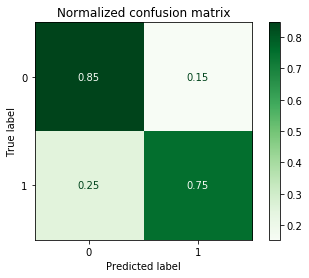

In [46]:
disp = plot_confusion_matrix(logisticRegr_embedd, x_test_embedd, y_test_embedd,
                                 cmap=plt.cm.Greens,
                                 normalize='true')
disp.ax_.set_title('Normalized confusion matrix')
plt.show()

<h2>Paso a exportar el mejor resultado

In [13]:
x_train_final = process_dataset(train_dataset, use_spacy=True, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5961027457927369


In [14]:
x_test_final = process_dataset(test_dataset, use_spacy=True, use_manual_features=False)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.5707598689343111
Embeddings loaded!
Percentage of words covered in the embeddings = 0.665389037945573


In [21]:
export_model_csv(logisticRegr_embedd, x_train_final, x_test_final, test_dataset, y, 'LR-spacy-no-feat-hyperpar')